In [47]:
 #detect time series using moving average
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')

In [48]:
#read data
data = pd.read_csv('../../data/m16_cpu_usage_v2_10minutes.csv', delimiter=',')
data['time'] = pd.to_datetime(data['time'])

In [49]:
data.tail()

,time,machine_id,cpu_util
3248,2017-10-25 13:20:00,m16,0.285000
3249,2017-10-25 13:30:00,m16,0.456667
3250,2017-10-25 13:40:00,m16,0.200000
3251,2017-10-25 13:50:00,m16,0.263333
3252,2017-10-25 14:00:00,m16,0.426667


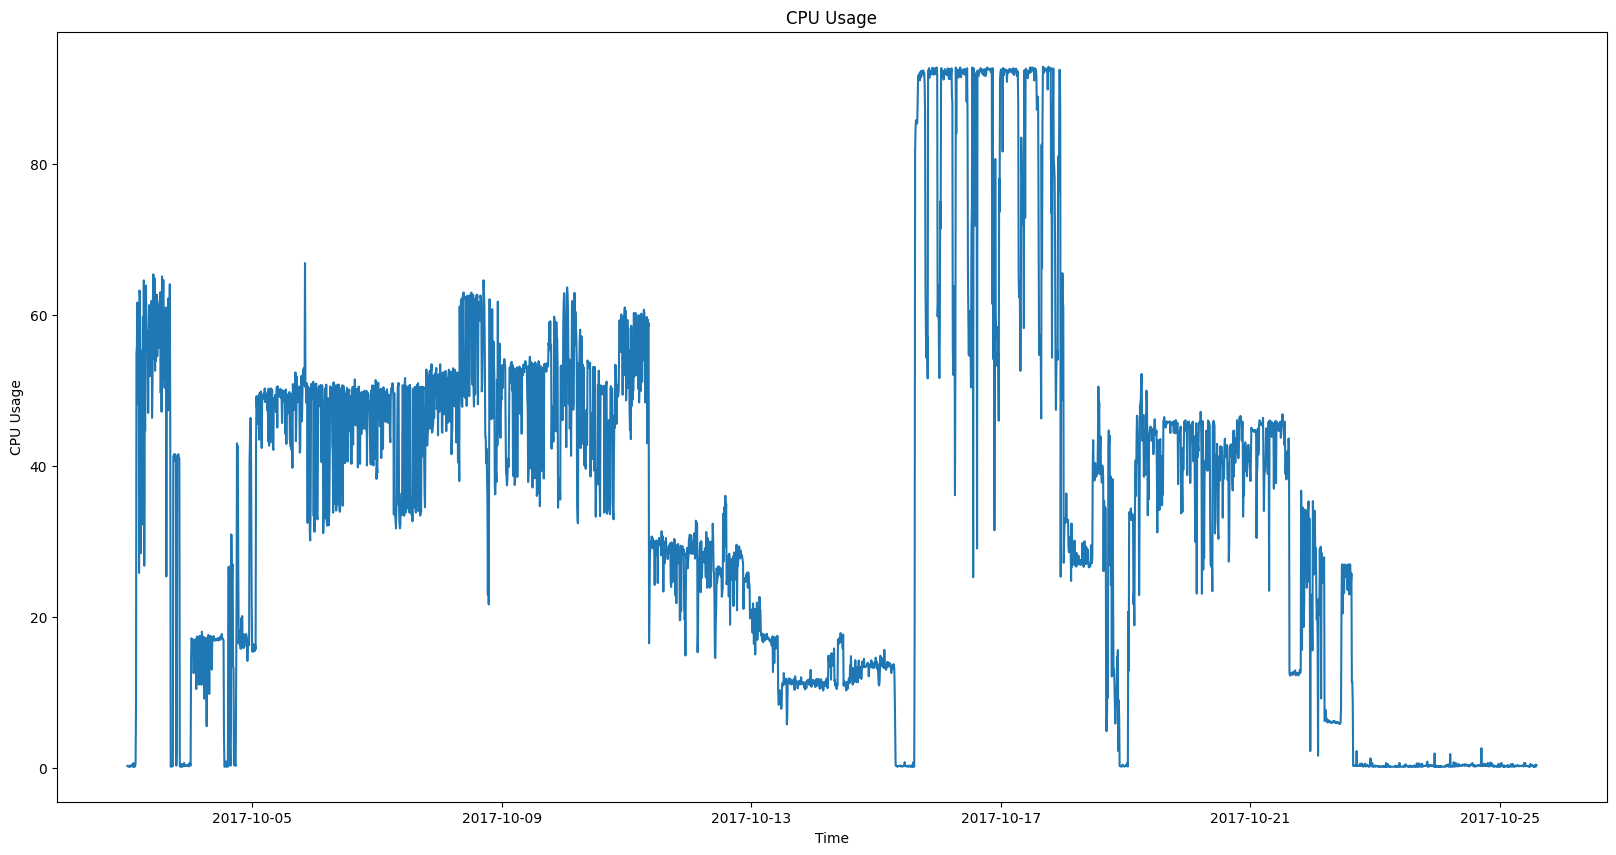

In [50]:
#plot data
plt.figure(figsize=(20,10))
plt.plot(data['time'], data['cpu_util'])
plt.title('CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.show()


In [51]:
#moving average
def moving_average(data, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')

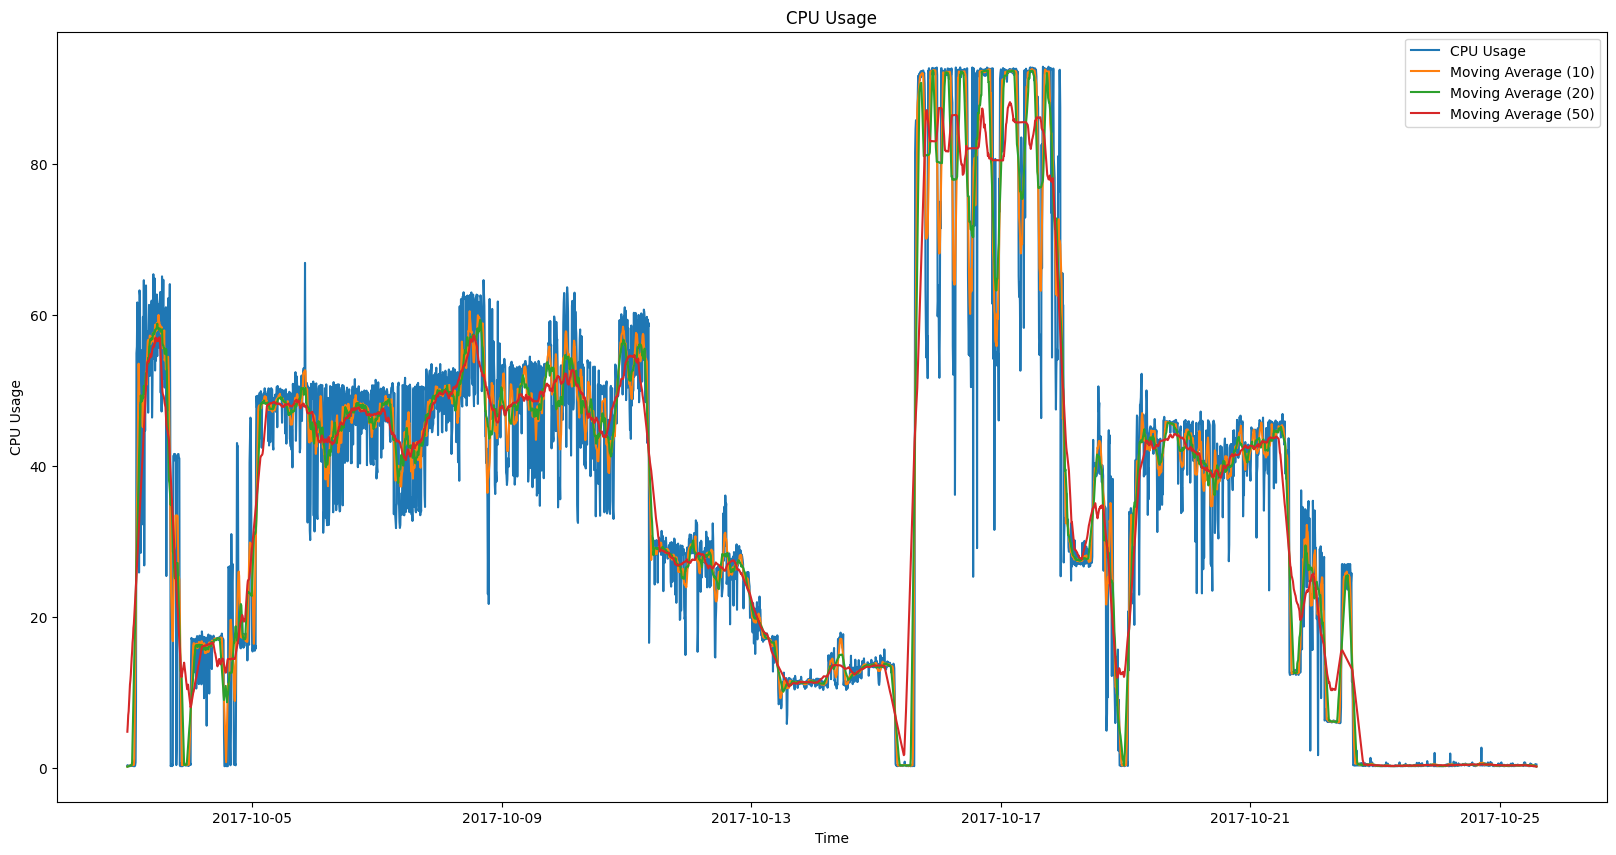

In [52]:
#plot moving average
plt.figure(figsize=(20,10))
plt.plot(data['time'], data['cpu_util'], label='CPU Usage')
plt.plot(data['time'], moving_average(data['cpu_util'], 10), label='Moving Average (10)')
plt.plot(data['time'], moving_average(data['cpu_util'], 20), label='Moving Average (20)')
plt.plot(data['time'], moving_average(data['cpu_util'], 50), label='Moving Average (50)')
plt.title('CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.legend()
plt.show()


In [53]:
#identify deviation
def identify_deviation(data, window_size, sigma):
    avg = moving_average(data, window_size).tolist()
    residual = data - avg
    std = np.std(residual)
    return np.where(residual > std*sigma, 1, 0)

In [54]:
#detect anomaly
def detect_anomaly(data, window_size, sigma):
    deviation = identify_deviation(data, window_size, sigma)
    index = np.where(deviation == 1)
    return index[0].tolist()


[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


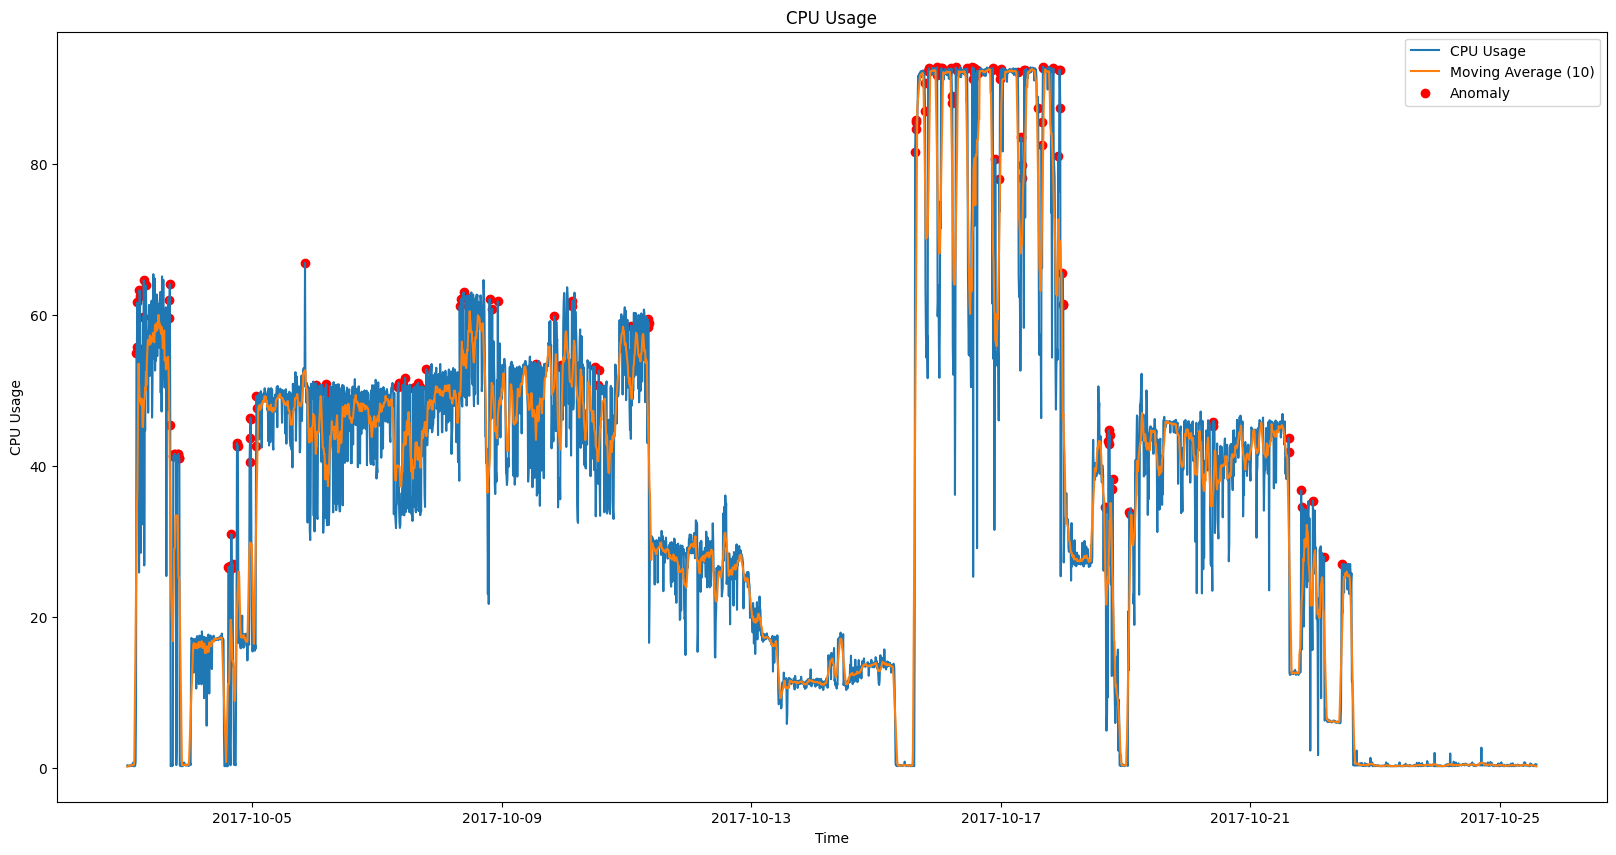

In [23]:
#plot anomaly with window size 10 and sigma 1.5
plt.figure(figsize=(20,10))
plt.plot(data['time'], data['cpu_util'], label='CPU Usage')
plt.plot(data['time'], moving_average(data['cpu_util'], 10), label='Moving Average (10)')
plt.scatter(data['time'][detect_anomaly(data['cpu_util'], 10, 1.5)], data['cpu_util'][detect_anomaly(data['cpu_util'], 10, 1.5)], label='Anomaly', color='red')
plt.title('CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.legend()
plt.show()


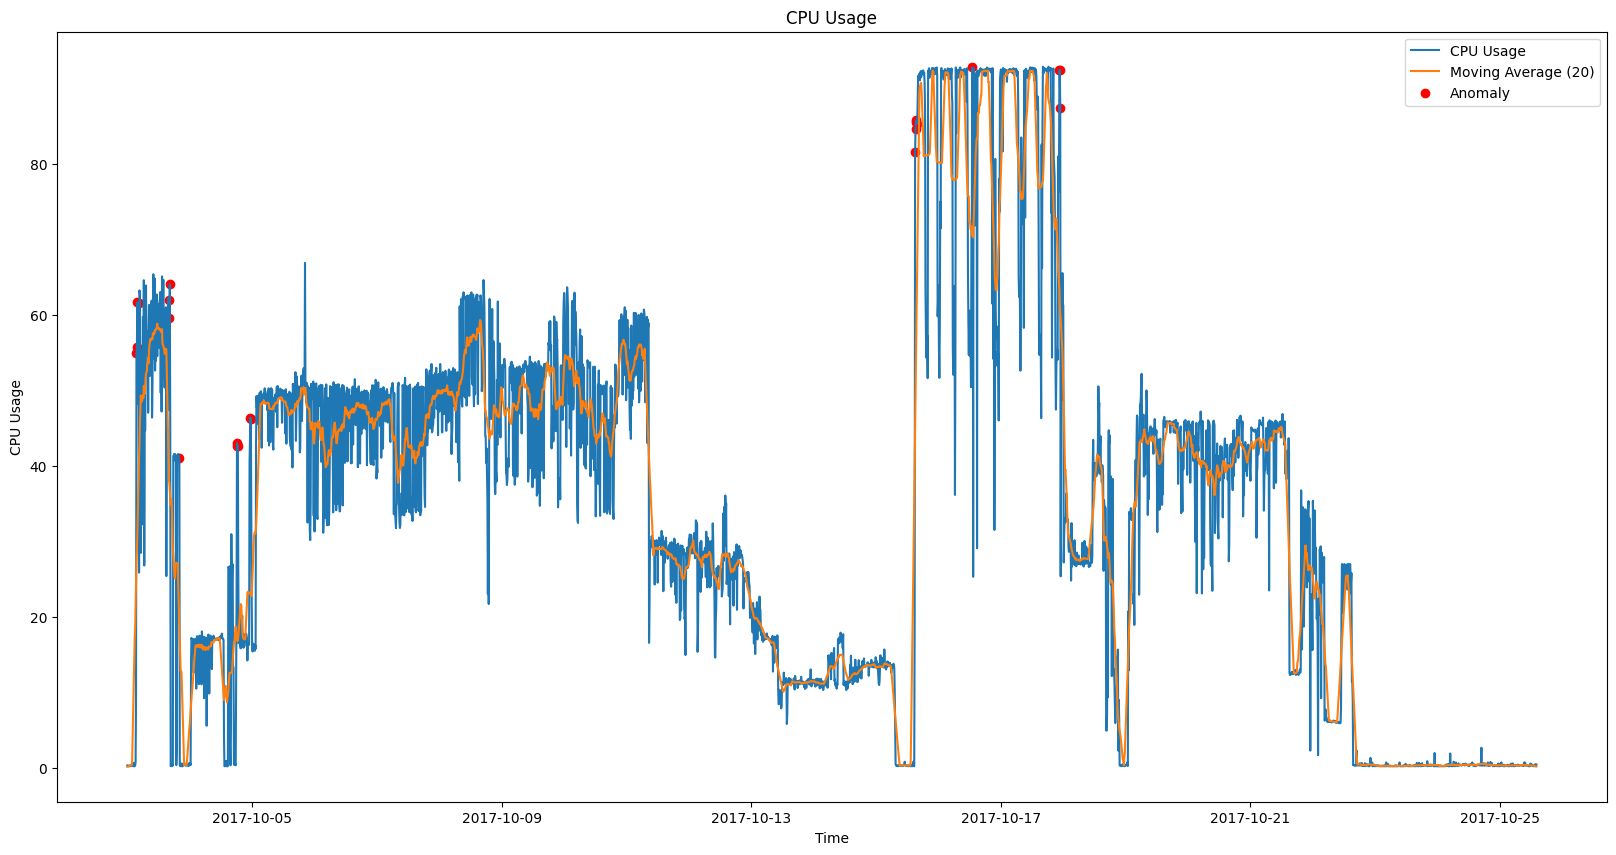

In [29]:
#plot anomaly with window size 20 and sigma 1.5
plt.figure(figsize=(20,10))
plt.plot(data['time'], data['cpu_util'], label='CPU Usage')
plt.plot(data['time'], moving_average(data['cpu_util'], 20), label='Moving Average (20)')
plt.scatter(data['time'][detect_anomaly(data['cpu_util'], 20, 3)], data['cpu_util'][detect_anomaly(data['cpu_util'], 20, 3)], label='Anomaly', color='red')
plt.title('CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.legend()
plt.show()


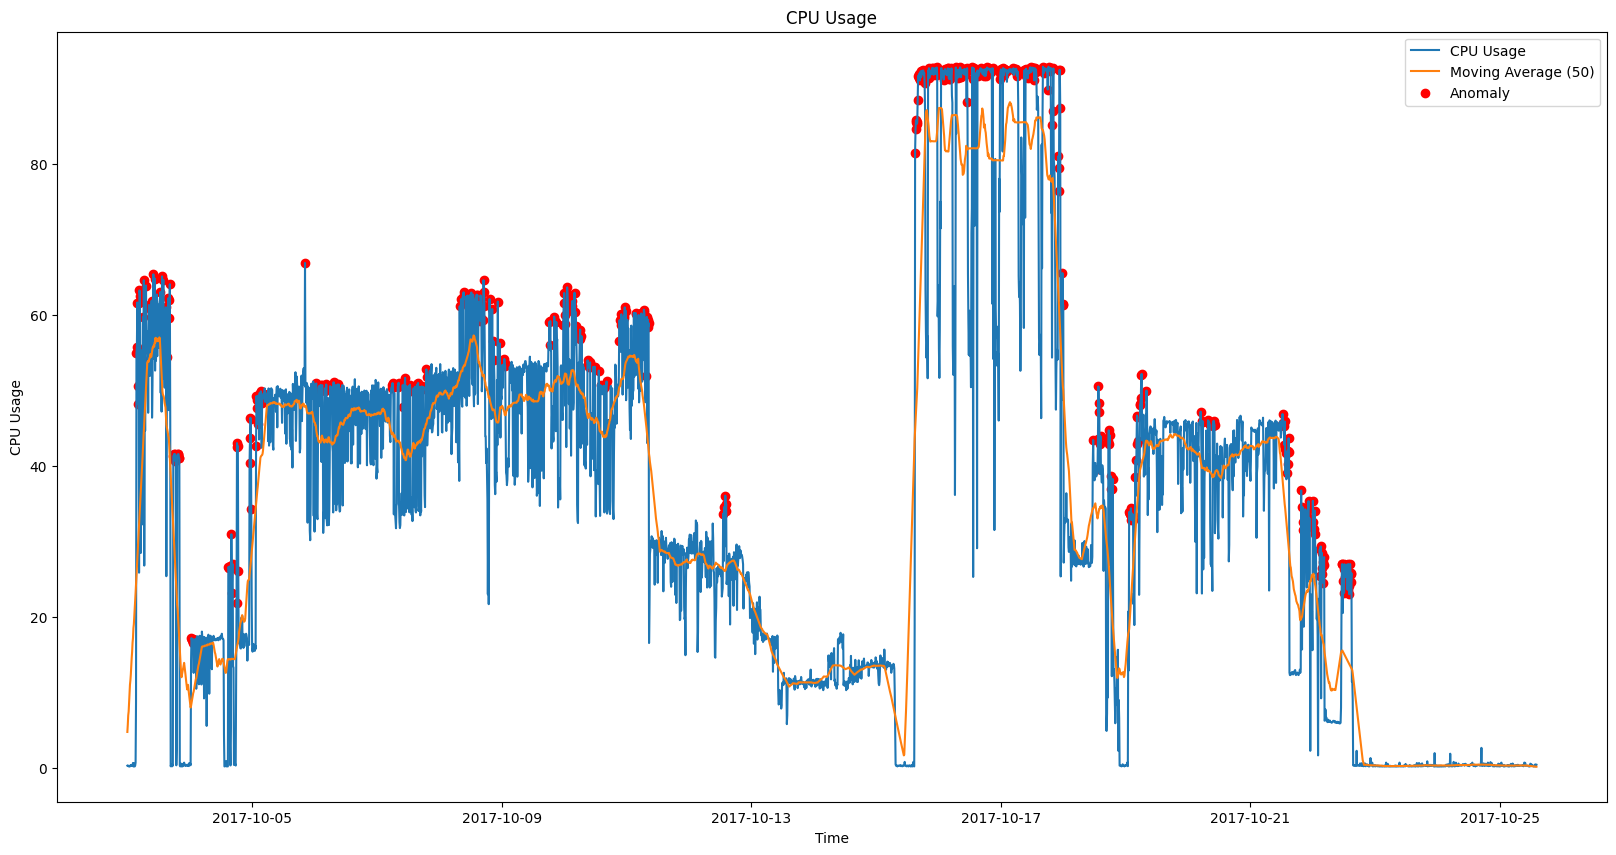

In [47]:
#plot anomaly with window size 50 and sigma 1.5
plt.figure(figsize=(20,10))
plt.plot(data['time'], data['cpu_util'], label='CPU Usage')
plt.plot(data['time'], moving_average(data['cpu_util'], 50), label='Moving Average (50)')
plt.scatter(data['time'][detect_anomaly(data['cpu_util'], 50, 0.7)], data['cpu_util'][detect_anomaly(data['cpu_util'], 50, 0.7)], label='Anomaly', color='red')
plt.title('CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.legend()
plt.show()

In [48]:
#label anomaly
data['anomaly'] = identify_deviation(data['cpu_util'], 50, 0.7)
data.head()


,time,machine_id,cpu_util,anomaly
0,2017-10-03 00:00:00,m16,0.300000,0
1,2017-10-03 00:10:00,m16,0.340000,0
2,2017-10-03 00:20:00,m16,0.253333,0
3,2017-10-03 00:30:00,m16,0.200000,0
4,2017-10-03 00:40:00,m16,0.200000,0


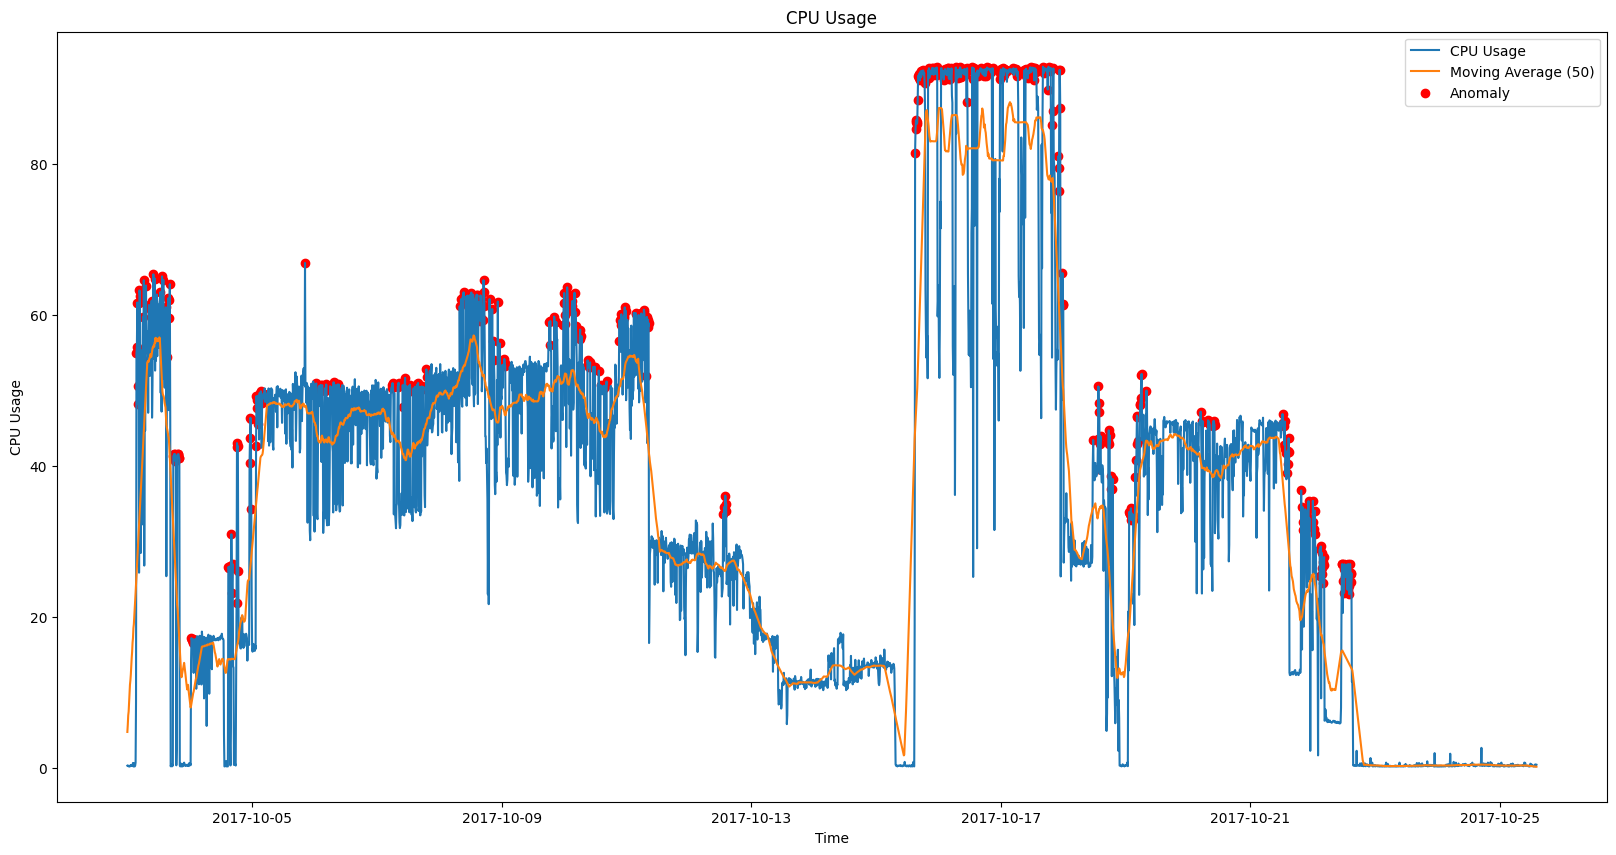

In [49]:
#plot anomaly
plt.figure(figsize=(20,10))
plt.plot(data['time'], data['cpu_util'], label='CPU Usage')
plt.plot(data['time'], moving_average(data['cpu_util'], 50), label='Moving Average (50)')
plt.scatter(data['time'][data['anomaly'] == 1], data['cpu_util'][data['anomaly'] == 1], label='Anomaly', color='red')
plt.title('CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.legend()
plt.show()


In [53]:
data.where(data['anomaly'] == 1).dropna()

,time,machine_id,cpu_util,anomaly
21,2017-10-03 03:30:00,m16,54.940000,1.0
22,2017-10-03 03:40:00,m16,55.800000,1.0
23,2017-10-03 03:50:00,m16,61.660000,1.0
24,2017-10-03 04:00:00,m16,50.533333,1.0
25,2017-10-03 04:10:00,m16,48.190000,1.0
...,...,...,...,...
2821,2017-10-22 14:10:00,m16,25.806667,1.0
2822,2017-10-22 14:20:00,m16,27.000000,1.0
2823,2017-10-22 14:30:00,m16,25.700000,1.0
2824,2017-10-22 14:40:00,m16,24.593333,1.0


In [54]:
data.to_csv('../../data/m16_cpu_usage_v2_10minutes_anomaly.csv', index=False)

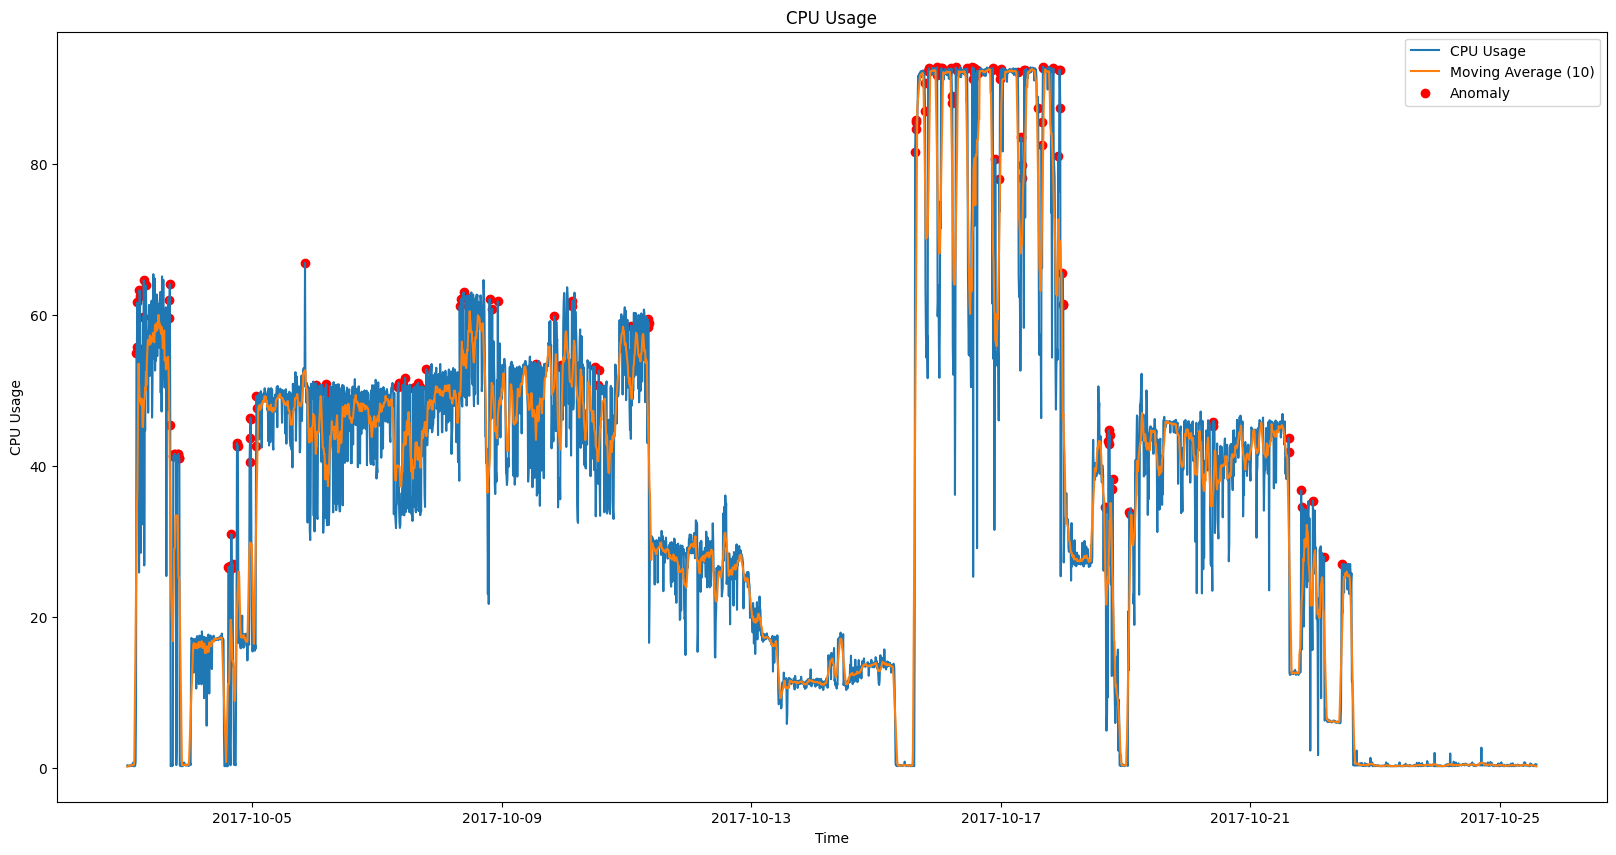

In [17]:
#plot anomaly with window size 10 and sigma 1.5
plt.figure(figsize=(20,10))
plt.plot(data['time'], data['cpu_util'], label='CPU Usage')
plt.plot(data['time'], moving_average(data['cpu_util'], 10), label='Moving Average (10)')
plt.scatter(data['time'][detect_anomaly(data['cpu_util'], 10, 1.5)], data['cpu_util'][detect_anomaly(data['cpu_util'], 10, 1.5)], label='Anomaly', color='red')
plt.title('CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
#show from2017-10-15 to 2017-10-18
plt.legend()
plt.show()


In [55]:
anomaly = detect_anomaly(data['cpu_util'], 10, 1.5)
anomaly = np.array(anomaly)

In [56]:
#input anomaly to data
data['anomaly'] = 0
data['anomaly'][anomaly] = 1
data.head()

,time,machine_id,cpu_util,anomaly
0,2017-10-03 00:00:00,m16,0.300000,0
1,2017-10-03 00:10:00,m16,0.340000,0
2,2017-10-03 00:20:00,m16,0.253333,0
3,2017-10-03 00:30:00,m16,0.200000,0
4,2017-10-03 00:40:00,m16,0.200000,0


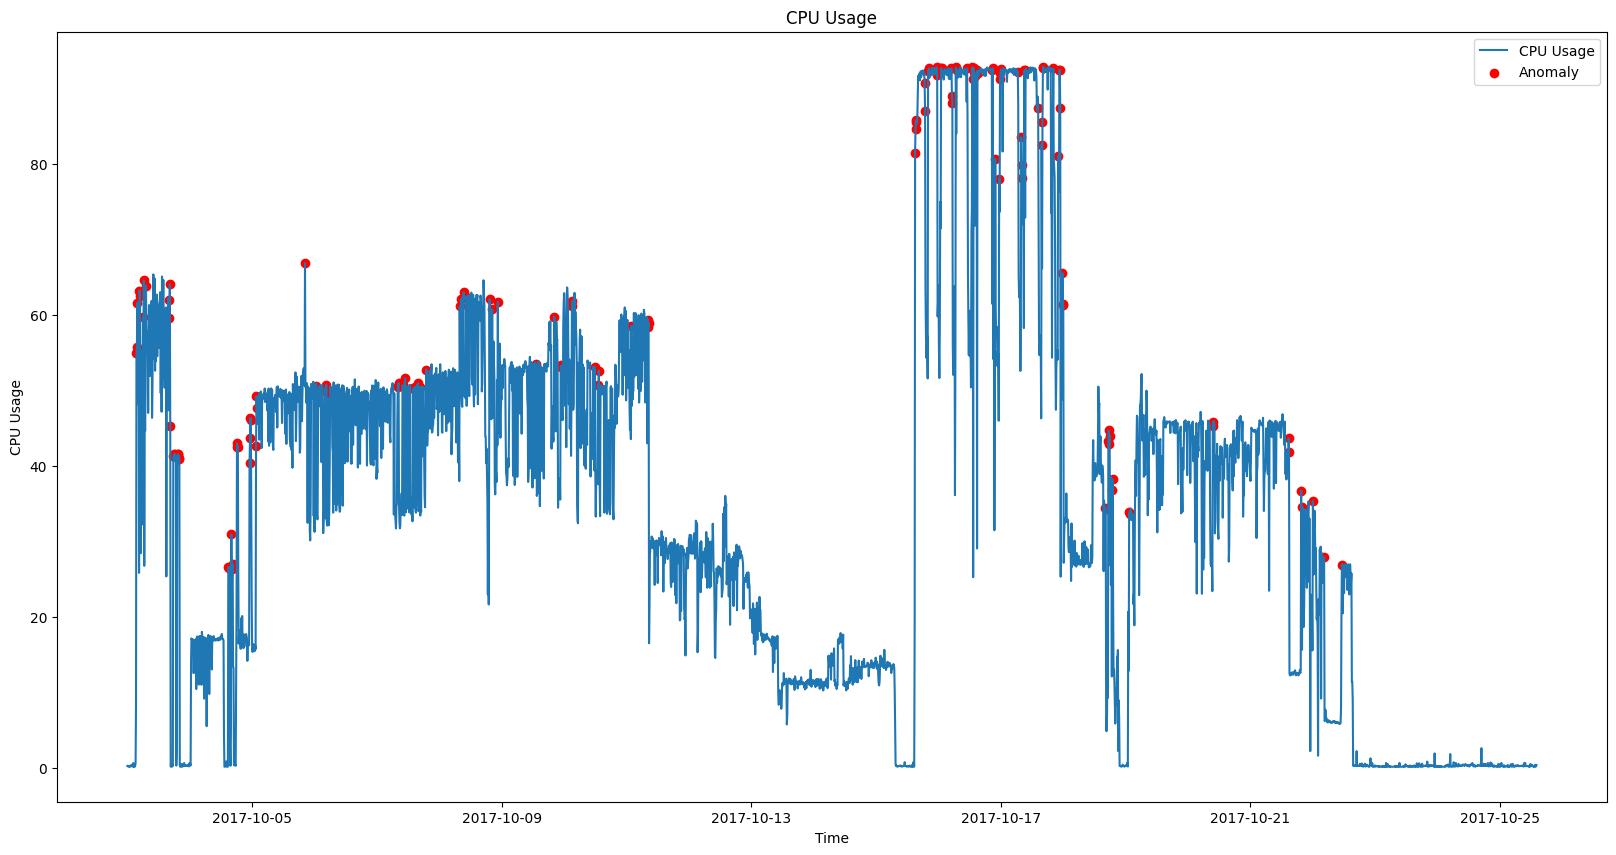

In [57]:
#plot anomaly with anomaly label
plt.figure(figsize=(20,10))
plt.plot(data['time'], data['cpu_util'], label='CPU Usage')
plt.scatter(data['time'][data['anomaly'] == 1], data['cpu_util'][data['anomaly'] == 1], label='Anomaly', color='red')
plt.title('CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.legend()
plt.show()


In [26]:
data.to_csv('../../data/m16_cpu_usage_v2_10minutes_anomaly_v2.csv', index=False)

In [58]:
num_lags = 1

#add lag
for i in range(1, num_lags+1):
    data['lag_{}'.format(i)] = data['cpu_util'].shift(i)
  
data = data.dropna()

In [59]:
data

,time,machine_id,cpu_util,anomaly,lag_1
1,2017-10-03 00:10:00,m16,0.340000,0,0.300000
2,2017-10-03 00:20:00,m16,0.253333,0,0.340000
3,2017-10-03 00:30:00,m16,0.200000,0,0.253333
4,2017-10-03 00:40:00,m16,0.200000,0,0.200000
5,2017-10-03 00:50:00,m16,0.248333,0,0.200000
...,...,...,...,...,...
3248,2017-10-25 13:20:00,m16,0.285000,0,0.200000
3249,2017-10-25 13:30:00,m16,0.456667,0,0.285000
3250,2017-10-25 13:40:00,m16,0.200000,0,0.456667
3251,2017-10-25 13:50:00,m16,0.263333,0,0.200000


In [60]:
data.to_csv('../../data/m16_cpu_usage_v2_10minutes_anomaly_v3_with_lag_1.csv', index=False)

In [61]:
data.where(data['anomaly'] == 1).dropna()

,time,machine_id,cpu_util,anomaly,lag_1
21,2017-10-03 03:30:00,m16,54.940000,1.0,8.753333
22,2017-10-03 03:40:00,m16,55.800000,1.0,54.940000
23,2017-10-03 03:50:00,m16,61.660000,1.0,55.800000
28,2017-10-03 04:40:00,m16,63.260000,1.0,25.868333
29,2017-10-03 04:50:00,m16,62.575000,1.0,63.260000
...,...,...,...,...,...
2709,2017-10-21 19:30:00,m16,36.758333,1.0,13.053333
2712,2017-10-21 20:00:00,m16,34.565833,1.0,15.690000
2736,2017-10-22 00:00:00,m16,35.378333,1.0,15.593333
2762,2017-10-22 04:20:00,m16,27.935000,1.0,26.833333


In [62]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools


In [63]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    Reference: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    
    plt.figure(figsize=(20,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if cm[i,j] > 0:
            plt.text(j, i, cm[i,j], horizontalalignment='center', color='white' if cm[i,j] > thresh else 'black', fontsize=15)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)
    plt.show()

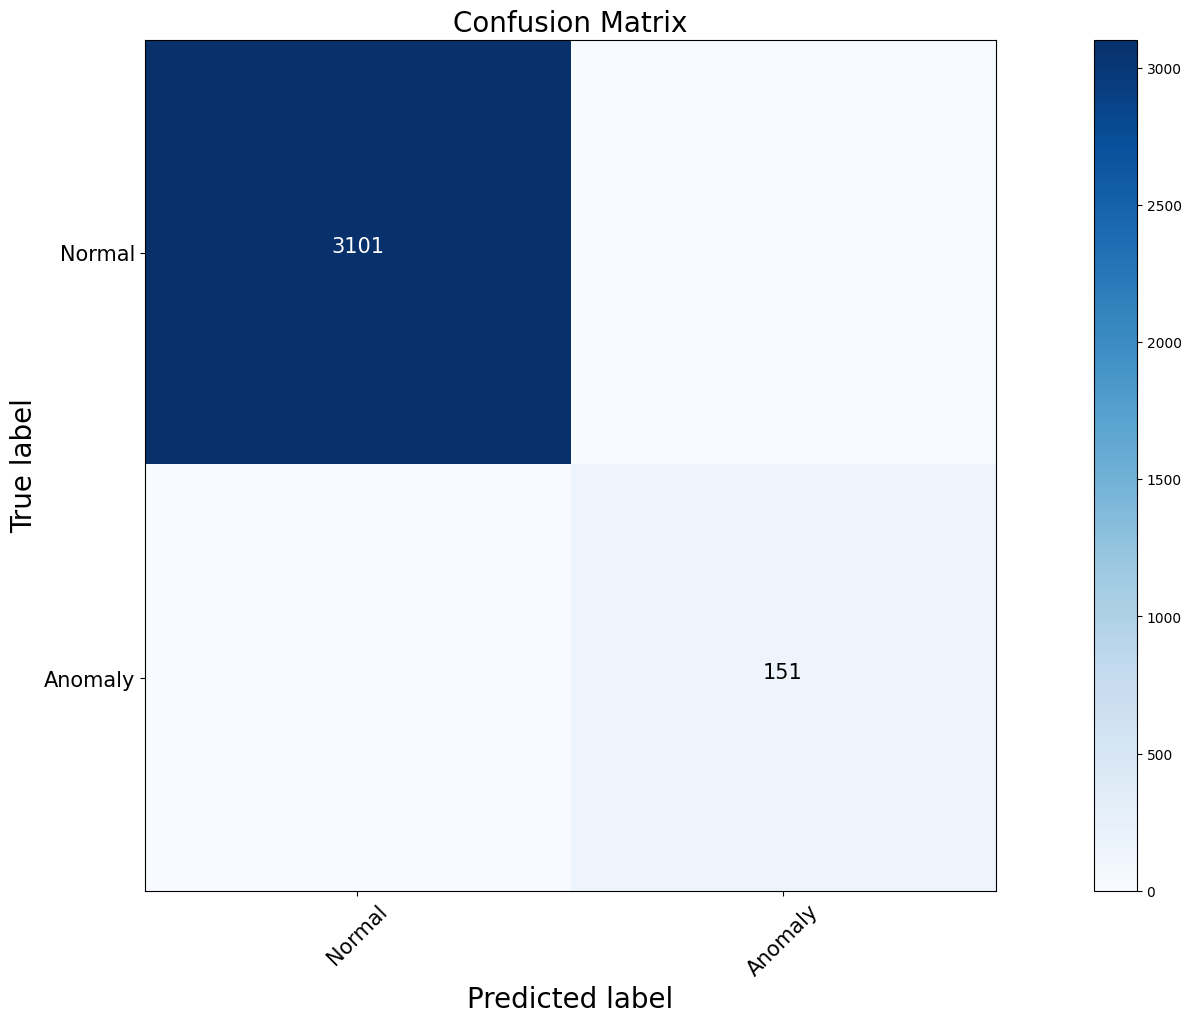

In [64]:
 
#plot confusion matrix
cm = confusion_matrix(data['anomaly'], data['anomaly'])
plot_confusion_matrix(cm, ['Normal', 'Anomaly'], title='Confusion Matrix')